In [2]:
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib import collections as mc
import warnings
import numpy as np
import time
import os
from apgl.graph import VertexList
from scipy.io import mmread, mminfo
import networkx as nx 
warnings.filterwarnings('ignore')

/u/morahma/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
def drawlinegraph(G, Xin, Xout, algo1="Algo1", algo2="Algo2"):
    gridsize = (1, 2)
    fig = plt.figure(figsize=(15, 6))
    axIN = plt.subplot2grid(gridsize, (0, 0))
    plt.axis('off')
    axIN.set_title(algo1)
    axOUT = plt.subplot2grid(gridsize, (0, 1))
    axOUT.set_title(algo2)
    
    axIN.set_xlim(min(Xin[:,0]), max(Xin[:,0]))
    axIN.set_ylim(min(Xin[:,1]), max(Xin[:,1]))
    axOUT.set_xlim(min(Xout[:,0]), max(Xout[:,0]))
    axOUT.set_ylim(min(Xout[:,1]), max(Xout[:,1]))
    linesIN = []
    linesOUT = []
    e = 0
    for i,j in zip(*graph.nonzero()):
        if i>j:
            linesIN.append([Xin[i], Xin[j]])
            linesOUT.append([Xout[i], Xout[j]])
            e += 1
    print ("Total edges = ", e, " Average Degree:", sum(d for n,d in G.degree()) / float(len(G)))
    lcIN = mc.LineCollection(linesIN, linewidths=.3, colors='#0000007f')
    lcOUT = mc.LineCollection(linesOUT, linewidths=.3, colors='#0000007f')
    axIN.add_collection(lcIN)
    axOUT.add_collection(lcOUT)
    plt.axis('off')

In [4]:
def drawnetworkxgraph(G, layout, ns, alp):
    plt.axis('off')
    nx.draw_networkx(G, layout, node_size=ns, with_labels=False, alpha=alp)
    

In [20]:
#filename = "datasets/input/3elt_dual.mtx" 
#filename = "datasets/input/grid2_dual.mtx" 
#filename = "datasets/input/power.mtx" 
filename = "datasets/input/sf_ba6000.mtx" 
#filename = "datasets/input/googletopic.mtx"
graph = mmread(filename)
G = nx.Graph()
for i in range(mminfo(filename)[0]):
    G.add_node(i)
for i,j in zip(*graph.nonzero()):
    if i > j:
        G.add_edge(i, j)

In [7]:
G.number_of_edges()

13278

In [12]:
#nx.write_gml(G,"datasets/input/googletopic.gml")

In [8]:
from collections import OrderedDict
def readCoordinatesFromGML(graph):
    gfile = open(graph, "r")
    ofile = open(graph+".txt", "w")
    coordinates = OrderedDict()
    for line in gfile.readlines():
        line = line.strip()
        if "id" in line:
            nid = line.split(" ")[1]
        elif "x" in line:
            x = line.split(" ")[1]
        elif "y" in line:
            y = line.split(" ")[1]
            coordinates[nid] = x + "\t" + y
            ofile.write(coordinates[nid]+"\n")
    gfile.close()
    ofile.close()

In [9]:
readCoordinatesFromGML("datasets/output/3elt_dual.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/3elt_dual.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/3elt_dual.openord_600.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/grid2_dual.openord_600.gml")
readCoordinatesFromGML("datasets/output/power.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/power.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/power.openord_600.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/sf_ba6000.openord_600.gml")
readCoordinatesFromGML("datasets/output/googletopic.forceatlas2_600.gml")
readCoordinatesFromGML("datasets/output/googletopic.forceatlas2_BH_600.gml")
readCoordinatesFromGML("datasets/output/googletopic.openord_600.gml")

In [10]:
def readCoordinates(filename):
    corfile = open(filename)
    X = []
    for line in corfile.readlines():
        l = line.split("\t")
        X.append([float(l[0]), float(l[1])])
    X = np.array(X)
    corfile.close()
    return X

In [11]:
algo13elt_dual = readCoordinates("datasets/output/3elt_dual.mtxCACHEMINB128PARAOUTRAND600.txt")
algo23elt_dual = readCoordinates("datasets/output/3elt_dual.mtxCACHEMINB256PARAOUTRAND600.txt")
openord3elt_dual = readCoordinates("datasets/output/3elt_dual.openord_600.gml.txt")
forceatlas23elt_dual = readCoordinates("datasets/output/3elt_dual.forceatlas2_600.gml.txt")
forceatlas2bh3elt_dual = readCoordinates("datasets/output/3elt_dual.forceatlas2_BH_600.gml.txt")
tsNET3elt_dual = readCoordinates("datasets/output/3elt_dual.tsNET_600.txt")

In [13]:
algo1power = readCoordinates("datasets/output/power.mtxCACHEMINB128PARAOUTRAND600.txt")
algo2power = readCoordinates("datasets/output/power.mtxCACHEMINB256PARAOUTRAND600.txt")
openordpower = readCoordinates("datasets/output/power.openord_600.gml.txt")
forceatlas2power = readCoordinates("datasets/output/power.forceatlas2_600.gml.txt")
forceatlas2bhpower = readCoordinates("datasets/output/power.forceatlas2_BH_600.gml.txt")
tsNETpower = readCoordinates("datasets/output/power.tsNET_600.txt")

In [14]:
algo1sf_ba6000 = readCoordinates("datasets/output/sf_ba6000.mtxCACHEMINB128PARAOUTRAND600.txt")
algo2sf_ba6000 = readCoordinates("datasets/output/sf_ba6000.mtxCACHEMINB256PARAOUTRAND600.txt")
openordsf_ba6000 = readCoordinates("datasets/output/sf_ba6000.openord_600.gml.txt")
forceatlas2sf_ba6000 = readCoordinates("datasets/output/sf_ba6000.forceatlas2_600.gml.txt")
forceatlas2bhsf_ba6000 = readCoordinates("datasets/output/sf_ba6000.forceatlas2_BH_600.gml.txt")
tsNETsf_ba6000 = readCoordinates("datasets/output/sf_ba6000.tsNET_600.txt")

In [150]:
algo1googletopic = readCoordinates("datasets/output/googletopic.mtxCACHEMINB128PARAOUTRAND600.txt")
algo2googletopic = readCoordinates("datasets/output/googletopic.mtxCACHEMINB256PARAOUTRAND600.txt")
openordgoogletopic = readCoordinates("datasets/output/googletopic.openord_600.gml.txt")
forceatlas2googletopic = readCoordinates("datasets/output/googletopic.forceatlas2_600.gml.txt")
forceatlas2bhgoogletopic = readCoordinates("datasets/output/googletopic.forceatlas2_BH_600.gml.txt")

('Total edges = ', 13278, ' Average Degree:', 2.9506666666666668)
('Total edges = ', 13278, ' Average Degree:', 2.9506666666666668)
('Total edges = ', 13278, ' Average Degree:', 2.9506666666666668)


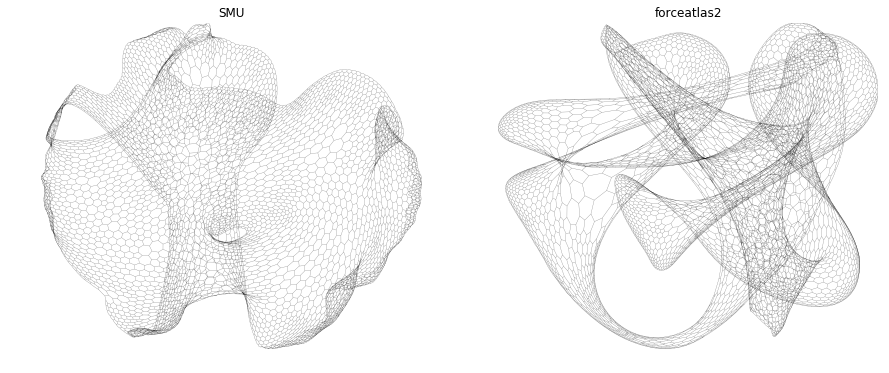

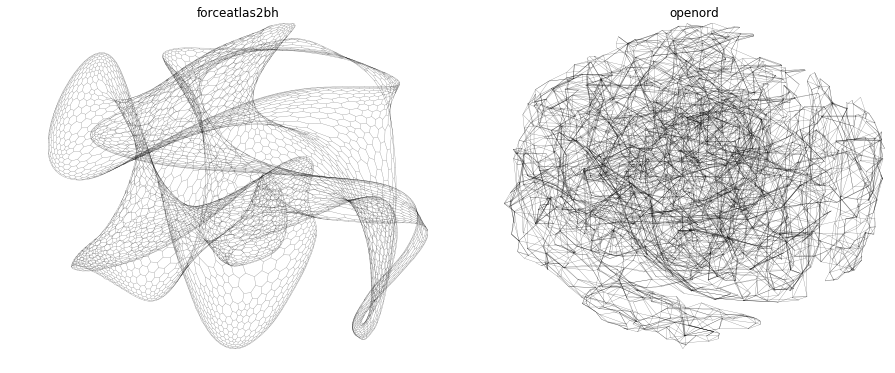

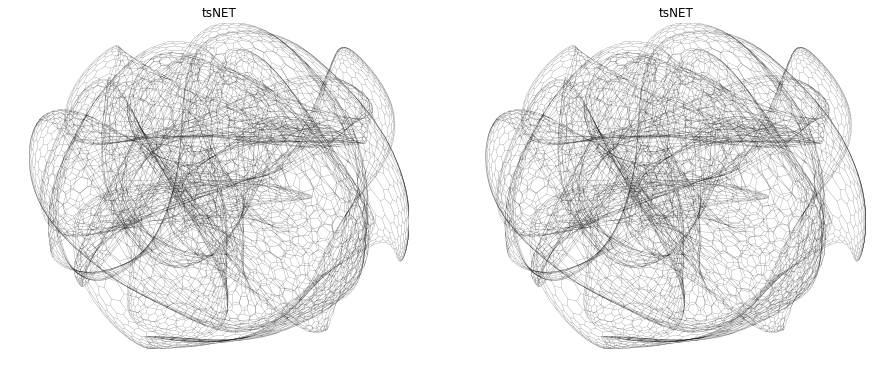

In [15]:
drawlinegraph(G, algo13elt_dual, forceatlas23elt_dual, "SMU", "forceatlas2")
drawlinegraph(G, forceatlas2bh3elt_dual, openord3elt_dual, "forceatlas2bh", "openord")
drawlinegraph(G, tsNET3elt_dual, tsNET3elt_dual, "tsNET", "tsNET")

('Total edges = ', 6594, ' Average Degree:', 2.66909532483303)
('Total edges = ', 6594, ' Average Degree:', 2.66909532483303)
('Total edges = ', 6594, ' Average Degree:', 2.66909532483303)


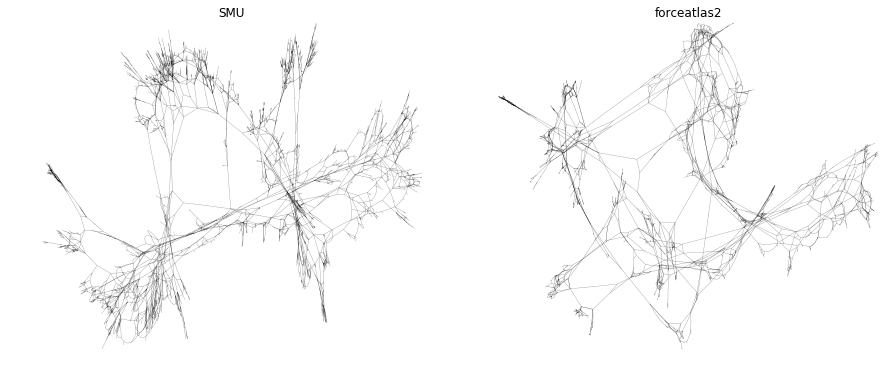

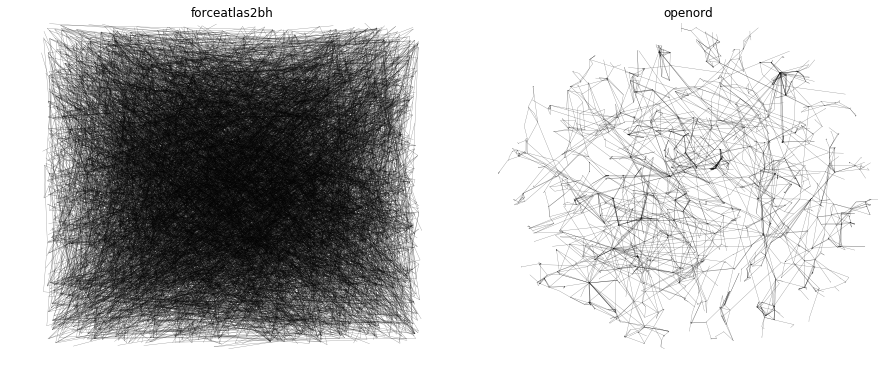

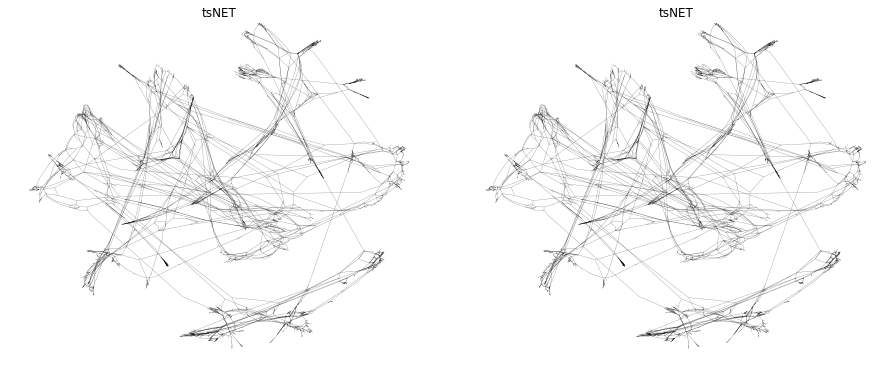

In [19]:
drawlinegraph(G, algo2power, forceatlas2power, "SMU", "forceatlas2")
drawlinegraph(G, forceatlas2bhpower, openordpower, "forceatlas2bh", "openord")
drawlinegraph(G, tsNETpower, tsNETpower, "tsNET", "tsNET")

('Total edges = ', 5999, ' Average Degree:', 1.9996666666666667)
('Total edges = ', 5999, ' Average Degree:', 1.9996666666666667)
('Total edges = ', 5999, ' Average Degree:', 1.9996666666666667)


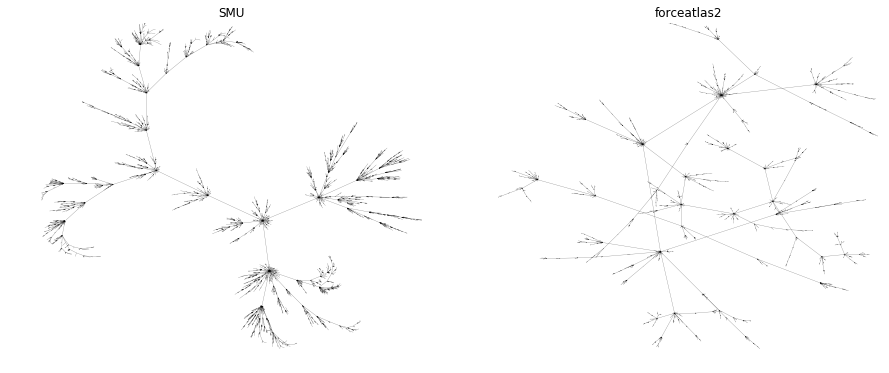

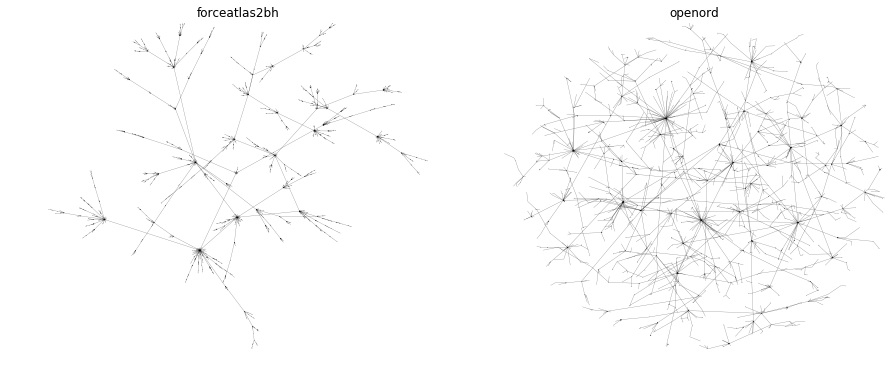

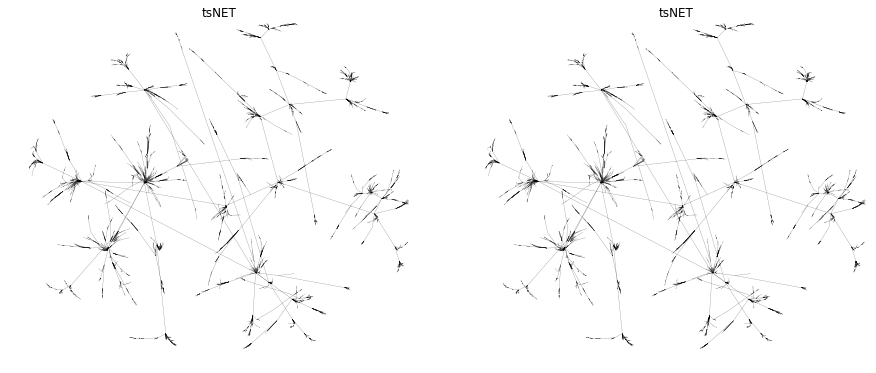

In [21]:
drawlinegraph(G, algo2sf_ba6000, forceatlas2sf_ba6000, "SMU", "forceatlas2")
drawlinegraph(G, forceatlas2bhsf_ba6000, openordsf_ba6000, "forceatlas2bh", "openord")
drawlinegraph(G, tsNETsf_ba6000, tsNETsf_ba6000, "tsNET", "tsNET")

Total edges =  26817  Average Degree: 8.71955779548041
Total edges =  26817  Average Degree: 8.71955779548041


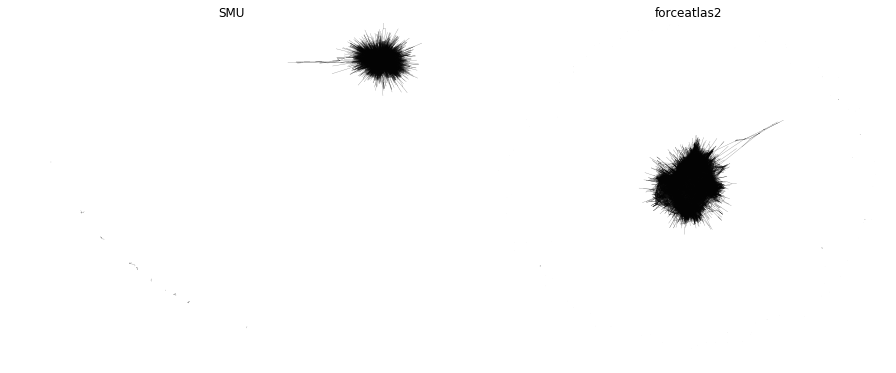

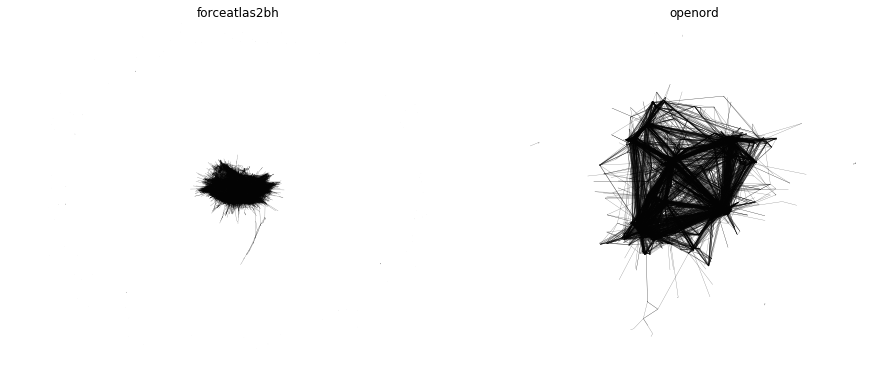

In [151]:
drawlinegraph(G, algo2googletopic, forceatlas2googletopic, "SMU", "forceatlas2")
drawlinegraph(G, forceatlas2bhgoogletopic, openordgoogletopic, "forceatlas2bh", "openord")

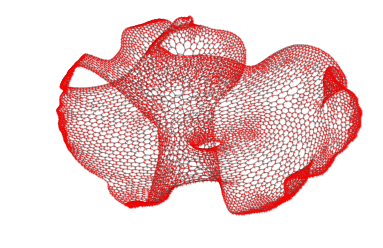

In [32]:
drawnetworkxgraph(G, algo13elt_dual, 1.2, 0.4)

In [33]:
def convertToGraphML(G, pos, filename):
    if len(G) > 0:
        pos = dict(enumerate(pos))
        for node, val in pos.items():
            x = val[0]
            y = val[1]
            G.node[node]['x'] = float(x)
            G.node[node]['y'] = float(y)
    nx.write_graphml(G, filename)

In [66]:
coordinates = readCoordinates("datasets/output/power.mtxCACHEMINB128PARAOUTRAND600.txt")

In [71]:
outputgmlfile = "datasets/output/power.mtxCACHEMINB128PARAOUTRAND600.txt.graphml"
convertToGraphML(G, coordinates, outputgmlfile)
#After this run following perl command
#perl -pe 's/d0/x/g;s/d1/y/g;' power.mtxCACHEMINB128PARAOUTRAND600.txt.graphml > power.mtxCACHEMINB128PARAOUTRAND600.txt.graphml.SMU.graphml
command = "perl -pe 's/d0/x/g;s/d1/y/g;' " + outputgmlfile +" > "+ outputgmlfile + ".SMU.graphml"
os.system(command)
os.system("rm " + outputgmlfile)

0

In [139]:
GT = nx.Graph()

In [141]:
import pygraphviz as pgv
g = pgv.AGraph("datasets/input/smaller_network_v3.dot")

In [142]:
for i in g:
    #print(i,g[i])
    GT.add_node(i)
    for j in g[i]:
        #print(i,j)
        GT.add_edge(i,j)
print(len(GT.nodes),len(GT.edges))
print(GT.number_of_nodes(), GT.number_of_edges())

6151 26817
6151 26817


In [145]:
#nx.write_gml(GT,"datasets/input/googletopic.gml")

In [144]:
googletopic = open("datasets/input/googletopic.mtx","w")
googletopic.write(str(len(GT.nodes))+" "+str(len(GT.nodes))+" "+ str(len(GT.edges)) + "\n")
for i,j in GT.edges:
    googletopic.write(str(int(j)+1)+ " "+str(int(i)+1) + "\n")
googletopic.close()

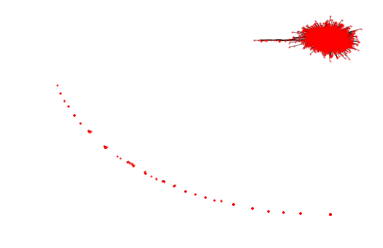

In [152]:
drawnetworkxgraph(G,algo2googletopic, 1.2, 0.4)